In [1]:
# libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [4]:
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)
# pd.set_option('display.max_colwidth',None)

In [5]:
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_colwidth')

In [6]:
# import data

usa_jobs = pd.read_csv('usajobs_clean.csv')

In [7]:
usa_jobs

,hiringDepartmentCode,hiringDepartmentName,positionLocations,positionOpenDate_year,appointmentType,workSchedule,payScale,salaryType,vendor,travelRequirement,...,minimumGrade,maximumGrade,promotionPotential,supervisoryStatus,drugTestRequired,relocationExpensesReimbursed,jobCode,jobSector,jobTitle,minimumSalary
0,3,Department of the Army,North Carolina,2020,1.0,Full-time,othr,1.0,Other,0.25,...,2.0,2.0,0.0,0,0,0,560,Budget,Analysis,54494.0
1,4,Department of Commerce,Texas,2016,1.0,Full-time,GS,1.0,HiringManagement,0.00,...,9.0,12.0,12.0,0,0,0,80,Security,Administration,53435.0
2,5,Department of Defense,Virginia,2017,0.0,Full-time,GS,1.0,USAStaffing,0.25,...,11.0,11.0,0.0,0,0,0,301,Miscellaneous Administration,Program,60210.0
3,3,Department of the Army,Alaska,2017,1.0,Full-time,GS,1.0,USAStaffing,0.25,...,11.0,11.0,0.0,0,0,0,5378,Powered Support Systems,Mechanic,66510.0
4,5,Department of the Air Force,New York,2017,0.0,Full-time,WG,1.0,USAStaffing,0.00,...,10.0,10.0,10.0,0,0,0,2152,Air Traffic,Control,64008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034664,3,Department of the Army,Texas,2017,1.0,Full-time,GS,1.0,USAStaffing,0.00,...,12.0,12.0,12.0,1,0,0,1801,"General Inspection, Investigation, Enforcement...",Series,72168.0
1034665,21,Department of Veterans Affairs,Virginia,2017,0.0,Full-time,GS,1.0,USAStaffing,0.25,...,6.0,6.0,0.0,0,0,0,801,General,Engineering,50910.0
1034666,5,Department of the Air Force,Virginia,2017,1.0,Full-time,GS,1.0,USAStaffing,0.25,...,7.0,7.0,7.0,0,0,0,1176,Building,Management,40684.0
1034667,3,Department of the Army,Virginia,2017,1.0,Full-time,GS,1.0,USAStaffing,0.25,...,13.0,13.0,0.0,1,0,1,610,Nurse,Work,85816.0


In [8]:
usa_jobs = usa_jobs.drop(columns=[
    
    'hiringDepartmentName',
    'jobSector',
    'jobTitle']
                        )

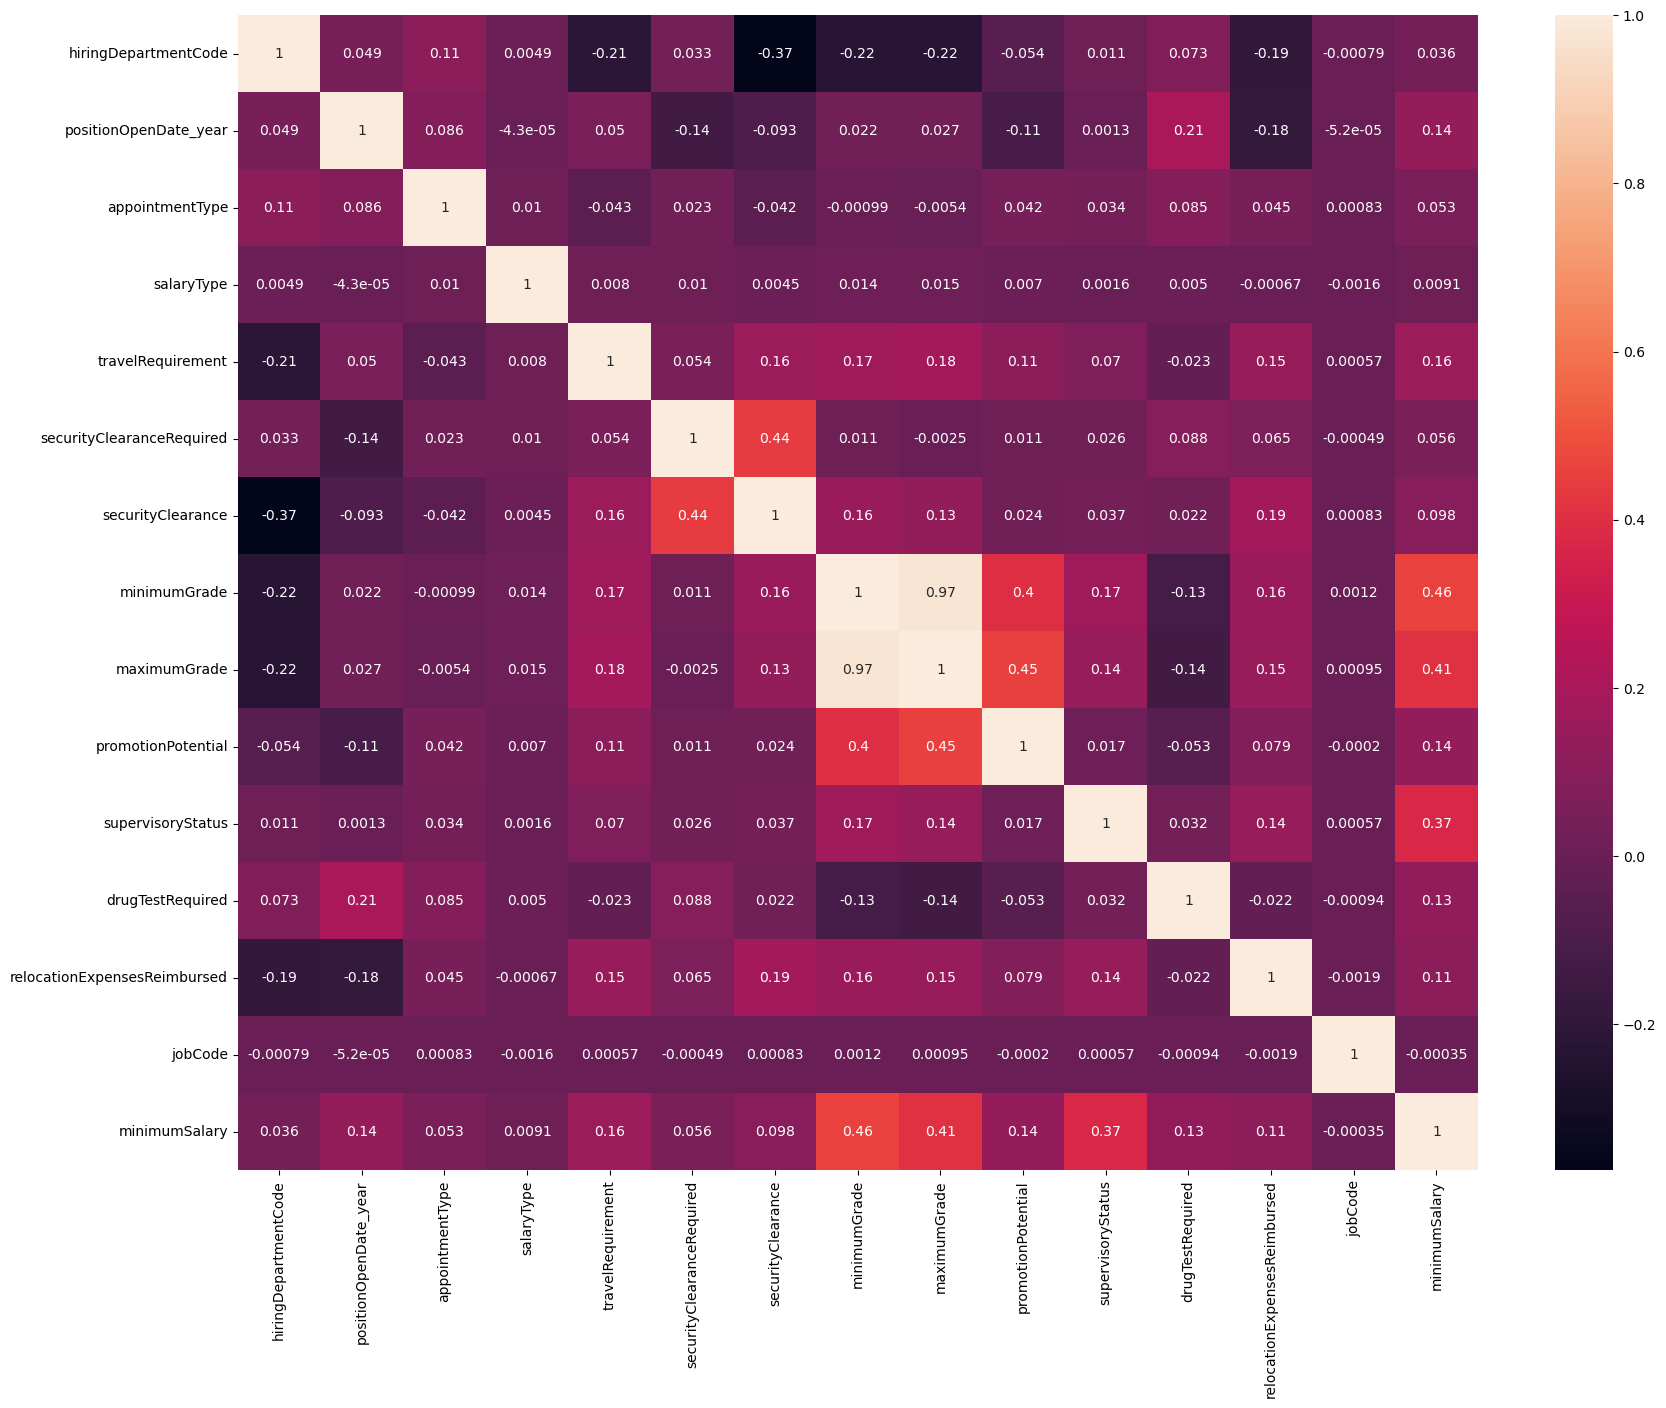

In [9]:
# checking multicollinearity

corr_matrix = usa_jobs.corr(numeric_only = True)
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [10]:
# separate target from features # X, y

data_y = usa_jobs['minimumSalary']
data_X = usa_jobs.drop('minimumSalary', axis=1)

In [11]:
# numerical vs. categorical

data_X_num = data_X.select_dtypes(include = np.number)
data_X_cat = data_X.select_dtypes(include = object)

print(data_X_num.shape)
print(data_X_cat.shape)

(1034669, 14)
(1034669, 5)


In [12]:
list(data_X_num.columns)

['hiringDepartmentCode',
 'positionOpenDate_year',
 'appointmentType',
 'salaryType',
 'travelRequirement',
 'securityClearanceRequired',
 'securityClearance',
 'minimumGrade',
 'maximumGrade',
 'promotionPotential',
 'supervisoryStatus',
 'drugTestRequired',
 'relocationExpensesReimbursed',
 'jobCode']

In [13]:
list(data_X_cat.columns)

['positionLocations', 'workSchedule', 'payScale', 'vendor', 'serviceType']

In [14]:
# categorical encoding # ordinal encoding vs. dummy code 

In [15]:
# training test split

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=1280)

print('X_train shape is',X_train.shape,', y_train shape is', y_train.shape)
print('X_test shape is', X_test.shape,', y_test shape is', y_test.shape)

X_train shape is (776001, 19) , y_train shape is (776001,)
X_test shape is (258668, 19) , y_test shape is (258668,)


In [16]:
# OneHotEncode the categorical columns

In [17]:
ohe_cols = list(data_X_cat.columns)

In [18]:
for col in data_X_cat.columns:
    print(col,len(data_X_cat[col].value_counts(dropna=False)),'\n')

positionLocations 57 

workSchedule 1 

payScale 33 

vendor 8 

serviceType 4 



In [19]:
X_train_ohe = X_train[ohe_cols]
X_train_ohe

,positionLocations,workSchedule,payScale,vendor,serviceType
640663,Utah,Full-time,GS,USAStaffing,Competitive
271222,California,Full-time,GS,USAStaffing,Competitive
782182,Pennsylvania,Full-time,GS,USAStaffing,Competitive
70438,District of Columbia,Full-time,GS,HiringManagement,Other
436942,Pennsylvania,Full-time,GG,USAStaffing,Other
...,...,...,...,...,...
152432,Missouri,Full-time,GS,USAStaffing,Competitive
17713,North Dakota,Full-time,GS,USAStaffing,Competitive
502706,Louisiana,Full-time,NH,USAStaffing,Other
64259,District of Columbia,Full-time,GS,USAStaffing,Competitive


In [20]:
X_test_ohe = X_test[ohe_cols]
X_test_ohe

,positionLocations,workSchedule,payScale,vendor,serviceType
320108,New York,Full-time,GS,USAStaffing,Competitive
834853,Kansas,Full-time,GS,NTIS,Competitive
459910,Texas,Full-time,GS,USAStaffing,Excepted
466535,Maryland,Full-time,GS,USAStaffing,Competitive
443466,Maryland,Full-time,GS,USAStaffing,Competitive
...,...,...,...,...,...
286594,Georgia,Full-time,GS,HiringManagement,Competitive
730628,Pennsylvania,Full-time,GS,USAStaffing,Excepted
221773,Connecticut,Full-time,GS,USAStaffing,Competitive
665818,Virginia,Full-time,othr,HiringManagement,Competitive


In [21]:
# OneHotEncode X_train

encoder_train = OneHotEncoder().fit(X_train_ohe)
cols_ohe = encoder_train.get_feature_names_out(input_features = X_train_ohe.columns)
X_train_ohe_encoded = pd.DataFrame(encoder_train.transform(X_train_ohe).toarray(),columns=cols_ohe)

X_train_ohe_encoded

,positionLocations_Alabama,positionLocations_Alaska,positionLocations_American Samoa,positionLocations_Arizona,positionLocations_Arkansas,positionLocations_California,positionLocations_Colorado,positionLocations_Connecticut,positionLocations_Delaware,positionLocations_District of Columbia,...,vendor_HiringManagement,vendor_NASA,vendor_NTIS,vendor_Other,vendor_PeopleSoft,vendor_USAStaffing,serviceType_Competitive,serviceType_Excepted,serviceType_Other,serviceType_Senior Executive
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
775997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
775998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
775999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [22]:
# OneHotEncode X_test

encoder_test = OneHotEncoder().fit(X_test_ohe)
cols_ohe = encoder_test.get_feature_names_out(input_features = X_test_ohe.columns)
X_test_ohe_encoded = pd.DataFrame(encoder_test.transform(X_test_ohe).toarray(),columns=cols_ohe)

X_test_ohe_encoded

,positionLocations_Alabama,positionLocations_Alaska,positionLocations_American Samoa,positionLocations_Arizona,positionLocations_Arkansas,positionLocations_California,positionLocations_Colorado,positionLocations_Connecticut,positionLocations_Delaware,positionLocations_District of Columbia,...,vendor_HiringManagement,vendor_NASA,vendor_NTIS,vendor_Other,vendor_PeopleSoft,vendor_USAStaffing,serviceType_Competitive,serviceType_Excepted,serviceType_Other,serviceType_Senior Executive
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
258664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
258665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
258666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
# MinMaxScaler for numerical columns

In [24]:
num_cols = list(data_X_num.columns)

In [25]:
X_train_2_scale = X_train[num_cols]
X_train_2_scale

,hiringDepartmentCode,positionOpenDate_year,appointmentType,salaryType,travelRequirement,securityClearanceRequired,securityClearance,minimumGrade,maximumGrade,promotionPotential,supervisoryStatus,drugTestRequired,relocationExpensesReimbursed,jobCode
640663,21,2022,0.0,1.0,0.00,0,1,13.0,13.0,0.0,1,0,0,2604
271222,5,2022,1.0,1.0,0.00,1,1,7.0,7.0,0.0,1,0,0,810
782182,14,2023,1.0,1.0,0.50,1,1,9.0,9.0,11.0,0,0,0,101
70438,6,2018,1.0,1.0,0.00,1,5,9.0,11.0,13.0,0,1,0,340
436942,16,2017,1.0,1.0,0.25,1,3,13.0,13.0,13.0,0,0,1,1150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152432,16,2019,1.0,1.0,0.25,1,5,12.0,12.0,12.0,0,1,1,326
17713,21,2021,0.5,1.0,0.00,1,1,3.0,3.0,3.0,0,0,0,303
502706,3,2017,1.0,1.0,0.50,1,5,4.0,4.0,4.0,1,0,0,560
64259,16,2019,1.0,1.0,0.25,1,5,12.0,12.0,12.0,0,0,0,301


In [26]:
X_test_2_scale = X_test[num_cols]
X_test_2_scale

,hiringDepartmentCode,positionOpenDate_year,appointmentType,salaryType,travelRequirement,securityClearanceRequired,securityClearance,minimumGrade,maximumGrade,promotionPotential,supervisoryStatus,drugTestRequired,relocationExpensesReimbursed,jobCode
320108,11,2019,1.0,1.0,0.50,0,1,14.0,14.0,14.0,0,0,0,343
834853,2,2018,1.0,1.0,0.25,1,1,13.0,13.0,13.0,1,0,1,301
459910,21,2020,1.0,1.0,0.00,1,1,9.0,9.0,0.0,0,1,0,1702
466535,2,2022,1.0,1.0,0.50,1,5,13.0,13.0,13.0,0,1,0,601
443466,11,2020,1.0,1.0,0.00,0,1,12.0,12.0,0.0,0,0,0,1801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286594,14,2020,1.0,1.0,0.25,1,1,4.0,5.0,5.0,0,1,0,303
730628,21,2022,1.0,1.0,0.25,1,1,12.0,12.0,12.0,0,0,0,86
221773,1,2019,1.0,1.0,0.25,0,1,7.0,7.0,7.0,0,0,0,86
665818,4,2022,1.0,1.0,0.75,1,1,3.0,4.0,4.0,0,1,0,301


In [27]:
# Initialize and fit the scaler

transformer = MinMaxScaler().fit(X_train_2_scale)

In [28]:
# X_train scaled dataset

X_norm1 = transformer.transform(X_train_2_scale)
X_train_scaled = pd.DataFrame(X_norm1, columns = X_train_2_scale.columns)
X_train_scaled = X_train_scaled.reset_index(drop=True)
X_train_scaled

,hiringDepartmentCode,positionOpenDate_year,appointmentType,salaryType,travelRequirement,securityClearanceRequired,securityClearance,minimumGrade,maximumGrade,promotionPotential,supervisoryStatus,drugTestRequired,relocationExpensesReimbursed,jobCode
0,0.714286,0.8,0.0,1.0,0.00,0.0,0.0,0.866667,0.866667,0.000000,1.0,0.0,0.0,0.259982
1,0.142857,0.8,1.0,1.0,0.00,1.0,0.0,0.466667,0.466667,0.000000,1.0,0.0,0.0,0.080456
2,0.464286,0.9,1.0,1.0,0.50,1.0,0.0,0.600000,0.600000,0.733333,0.0,0.0,0.0,0.009507
3,0.178571,0.4,1.0,1.0,0.00,1.0,1.0,0.600000,0.733333,0.866667,0.0,1.0,0.0,0.033423
4,0.535714,0.3,1.0,1.0,0.25,1.0,0.5,0.866667,0.866667,0.866667,0.0,0.0,1.0,0.114480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775996,0.535714,0.5,1.0,1.0,0.25,1.0,1.0,0.800000,0.800000,0.800000,0.0,1.0,1.0,0.032022
775997,0.714286,0.7,0.5,1.0,0.00,1.0,0.0,0.200000,0.200000,0.200000,0.0,0.0,0.0,0.029721
775998,0.071429,0.3,1.0,1.0,0.50,1.0,1.0,0.266667,0.266667,0.266667,1.0,0.0,0.0,0.055439
775999,0.535714,0.5,1.0,1.0,0.25,1.0,1.0,0.800000,0.800000,0.800000,0.0,0.0,0.0,0.029521


In [29]:
# X_test scaled dataset

X_norm2 = transformer.transform(X_test_2_scale)
X_test_scaled = pd.DataFrame(X_norm2, columns = X_test_2_scale.columns)
X_test_scaled = X_test_scaled.reset_index(drop=True)
X_test_scaled

,hiringDepartmentCode,positionOpenDate_year,appointmentType,salaryType,travelRequirement,securityClearanceRequired,securityClearance,minimumGrade,maximumGrade,promotionPotential,supervisoryStatus,drugTestRequired,relocationExpensesReimbursed,jobCode
0,0.357143,0.5,1.0,1.0,0.50,0.0,0.0,0.933333,0.933333,0.933333,0.0,0.0,0.0,0.033724
1,0.035714,0.4,1.0,1.0,0.25,1.0,0.0,0.866667,0.866667,0.866667,1.0,0.0,1.0,0.029521
2,0.714286,0.6,1.0,1.0,0.00,1.0,0.0,0.600000,0.600000,0.000000,0.0,1.0,0.0,0.169719
3,0.035714,0.8,1.0,1.0,0.50,1.0,1.0,0.866667,0.866667,0.866667,0.0,1.0,0.0,0.059542
4,0.357143,0.6,1.0,1.0,0.00,0.0,0.0,0.800000,0.800000,0.000000,0.0,0.0,0.0,0.179626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258663,0.464286,0.6,1.0,1.0,0.25,1.0,0.0,0.266667,0.333333,0.333333,0.0,1.0,0.0,0.029721
258664,0.714286,0.8,1.0,1.0,0.25,1.0,0.0,0.800000,0.800000,0.800000,0.0,0.0,0.0,0.008006
258665,0.000000,0.5,1.0,1.0,0.25,0.0,0.0,0.466667,0.466667,0.466667,0.0,0.0,0.0,0.008006
258666,0.107143,0.8,1.0,1.0,0.75,1.0,0.0,0.200000,0.266667,0.266667,0.0,1.0,0.0,0.029521


In [30]:
X_train_SE = pd.concat([X_train_ohe_encoded, X_train_scaled],axis = 1)
X_train_SE

,positionLocations_Alabama,positionLocations_Alaska,positionLocations_American Samoa,positionLocations_Arizona,positionLocations_Arkansas,positionLocations_California,positionLocations_Colorado,positionLocations_Connecticut,positionLocations_Delaware,positionLocations_District of Columbia,...,travelRequirement,securityClearanceRequired,securityClearance,minimumGrade,maximumGrade,promotionPotential,supervisoryStatus,drugTestRequired,relocationExpensesReimbursed,jobCode
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.866667,0.866667,0.000000,1.0,0.0,0.0,0.259982
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.00,1.0,0.0,0.466667,0.466667,0.000000,1.0,0.0,0.0,0.080456
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,1.0,0.0,0.600000,0.600000,0.733333,0.0,0.0,0.0,0.009507
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.00,1.0,1.0,0.600000,0.733333,0.866667,0.0,1.0,0.0,0.033423
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,1.0,0.5,0.866667,0.866667,0.866667,0.0,0.0,1.0,0.114480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,1.0,1.0,0.800000,0.800000,0.800000,0.0,1.0,1.0,0.032022
775997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,1.0,0.0,0.200000,0.200000,0.200000,0.0,0.0,0.0,0.029721
775998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,1.0,1.0,0.266667,0.266667,0.266667,1.0,0.0,0.0,0.055439
775999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.25,1.0,1.0,0.800000,0.800000,0.800000,0.0,0.0,0.0,0.029521


In [31]:
X_test_SE = pd.concat([X_test_ohe_encoded, X_test_scaled], axis = 1)
X_test_SE

,positionLocations_Alabama,positionLocations_Alaska,positionLocations_American Samoa,positionLocations_Arizona,positionLocations_Arkansas,positionLocations_California,positionLocations_Colorado,positionLocations_Connecticut,positionLocations_Delaware,positionLocations_District of Columbia,...,travelRequirement,securityClearanceRequired,securityClearance,minimumGrade,maximumGrade,promotionPotential,supervisoryStatus,drugTestRequired,relocationExpensesReimbursed,jobCode
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.0,0.0,0.933333,0.933333,0.933333,0.0,0.0,0.0,0.033724
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,1.0,0.0,0.866667,0.866667,0.866667,1.0,0.0,1.0,0.029521
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,1.0,0.0,0.600000,0.600000,0.000000,0.0,1.0,0.0,0.169719
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,1.0,1.0,0.866667,0.866667,0.866667,0.0,1.0,0.0,0.059542
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.800000,0.800000,0.000000,0.0,0.0,0.0,0.179626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,1.0,0.0,0.266667,0.333333,0.333333,0.0,1.0,0.0,0.029721
258664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,1.0,0.0,0.800000,0.800000,0.800000,0.0,0.0,0.0,0.008006
258665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.25,0.0,0.0,0.466667,0.466667,0.466667,0.0,0.0,0.0,0.008006
258666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,1.0,0.0,0.200000,0.266667,0.266667,0.0,1.0,0.0,0.029521


In [32]:
len(list(X_test_SE.columns))

117

In [33]:
# Models

In [34]:
X_train_SE.dtypes

positionLocations_Alabama           float64
positionLocations_Alaska            float64
positionLocations_American Samoa    float64
positionLocations_Arizona           float64
positionLocations_Arkansas          float64
                                     ...   
promotionPotential                  float64
supervisoryStatus                   float64
drugTestRequired                    float64
relocationExpensesReimbursed        float64
jobCode                             float64
Length: 117, dtype: object

In [35]:
X_test_SE.dtypes

positionLocations_Alabama           float64
positionLocations_Alaska            float64
positionLocations_American Samoa    float64
positionLocations_Arizona           float64
positionLocations_Arkansas          float64
                                     ...   
promotionPotential                  float64
supervisoryStatus                   float64
drugTestRequired                    float64
relocationExpensesReimbursed        float64
jobCode                             float64
Length: 117, dtype: object

In [36]:
# Define function to run all models

def models_automation(models, X_tr, y_tr,X_te, y_te):
    
    for model in models:
        
        model.fit(X_tr, y_tr)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_tr, y_tr)}, Test -> {model.score(X_te, y_te)}")

In [37]:
model_list = [LinearRegression(),
              SGDRegressor(),
              KNeighborsRegressor(),
              MLPRegressor(),
              DecisionTreeRegressor(),
              RandomForestRegressor()]

models_automation(model_list, X_train_SE, y_train, X_test_SE, y_test)

LinearRegression: Train -> 0.6932158592043335, Test -> 0.6955096045920907
SGDRegressor: Train -> 0.6927584708675274, Test -> 0.6950071184862661
KNeighborsRegressor: Train -> 0.8467230371953148, Test -> 0.7641784445916242


C:\Users\roba\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Train -> 0.7485547820770322, Test -> 0.749106802506817
DecisionTreeRegressor: Train -> 0.9964252844837954, Test -> 0.7902547732183801
RandomForestRegressor: Train -> 0.9796617783293976, Test -> 0.8735944562456466


In [38]:
# -Ok!? results, are looking too good to be true! I have no Idea why?!...

In [39]:
# imbalance in the data? # No!

print(y_test.value_counts())

73375.0     2307
82830.0     2145
57118.0     2134
79363.0     2120
50598.0     2033
            ... 
41744.0        1
122730.0       1
85830.0        1
43667.0        1
78310.0        1
Name: minimumSalary, Length: 19852, dtype: int64


In [40]:
lm = LinearRegression()          # model
lm.fit(X_train_SE, y_train)      # model training
y_pred = lm.predict(X_test_SE)   # model prediction

In [41]:
# Validation R2 scores

print ('train R2: {} -- test R2: {}'.format(lm.score(X_train_SE, y_train),
                                            lm.score(X_test_SE, y_test)))

train R2: 0.6932158592043335 -- test R2: 0.6955096045920907


In [42]:
train_mse=mse(lm.predict(X_train_SE), y_train)
test_mse=mse(y_pred, y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 292164315.30752 -- test MSE: 289936958.50848067


In [43]:
# Root Mean Squared Error

print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 17092.814727467212 -- test RMSE: 17027.535303398454


In [44]:
train_mae=mae(lm.predict(X_train_SE), y_train)
test_mae=mae(y_pred, y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mae, test_mae))

train MAE: 11233.679054820806 -- test MAE: 11216.162035582289
